# The effect of over-sampling and under-sampling on model calibration

This note book examines the effect of under-sampling or over-sampling (including SMOTE) to balance training examples for imbalanced data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Generate data set

We will generate a set of data where 90% of examples are the negative class, and 10% the positive class.

In [2]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
        n_clusters_per_class=1, weights=[0.90, 0.10], class_sep=0.60, flip_y=0,
        hypercube=True, random_state=42)

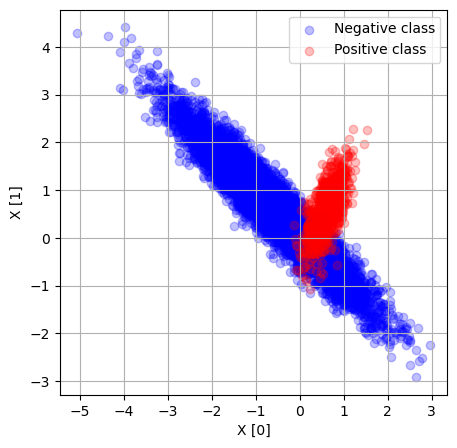

In [3]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot() 
mask = y == 0
ax.scatter (X[mask, 0], X[mask, 1], c='b', alpha=0.25, label='Negative class')
mask = y == 1
ax.scatter (X[mask, 0], X[mask, 1], c='r', alpha=0.25, label='Positive class')
ax.legend()
ax.set_xlabel('X [0]')
ax.set_ylabel('X [1]')
ax.grid()
plt.show()

### Split into training and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Fit models to originl data, or data with oversampling or undersampling

### Fit model to original data balance

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Get acuracy scores
print (f'ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):0.3f}')
print (f'Recall: {recall_score(model.predict(X_test), y_test):0.3f}')
print (f'Precision: {precision_score(model.predict(X_test), y_test):0.3f}')

ROC AUC: 0.942
Recall: 0.898
Precision: 0.754


### Fit model to random undersampled majority data

In [6]:
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

model_undersampled = LogisticRegression()
model_undersampled.fit(X_undersampled,y_undersampled)

# Get acuracy scores
print (f'ROC AUC: {roc_auc_score(y_test, model_undersampled.predict_proba(X_test)[:,1]):0.3f}')
print (f'Recall: {recall_score(model_undersampled.predict(X_test), y_test):0.3f}')
print (f'Precision: {precision_score(model_undersampled.predict(X_test), y_test):0.3f}')

ROC AUC: 0.948
Recall: 0.426
Precision: 0.881


### Fit model to random oversampled majority data

In [7]:
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

model_oversampled = LogisticRegression()
model_oversampled.fit(X_oversampled,y_oversampled)

# Get acuracy scores
print (f'ROC AUC: {roc_auc_score(y_test, model_oversampled.predict_proba(X_test)[:,1]):0.3f}')
print (f'Recall: {recall_score(model_oversampled.predict(X_test), y_test):0.3f}')
print (f'Precision: {precision_score(model_oversampled.predict(X_test), y_test):0.3f}')

ROC AUC: 0.947
Recall: 0.459
Precision: 0.873


## Fit model to SMOTE over-sampled data

In [8]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression()
model_smote.fit(X_smote, y_smote)

# Get acuracy scores
print (f'ROC AUC: {roc_auc_score(y_test, model_smote.predict_proba(X_test)[:,1]):0.3f}')
print (f'Recall: {recall_score(model_smote.predict(X_test), y_test):0.3f}')
print (f'Precision: {precision_score(model_smote.predict(X_test), y_test):0.3f}')

ROC AUC: 0.947
Recall: 0.463
Precision: 0.869


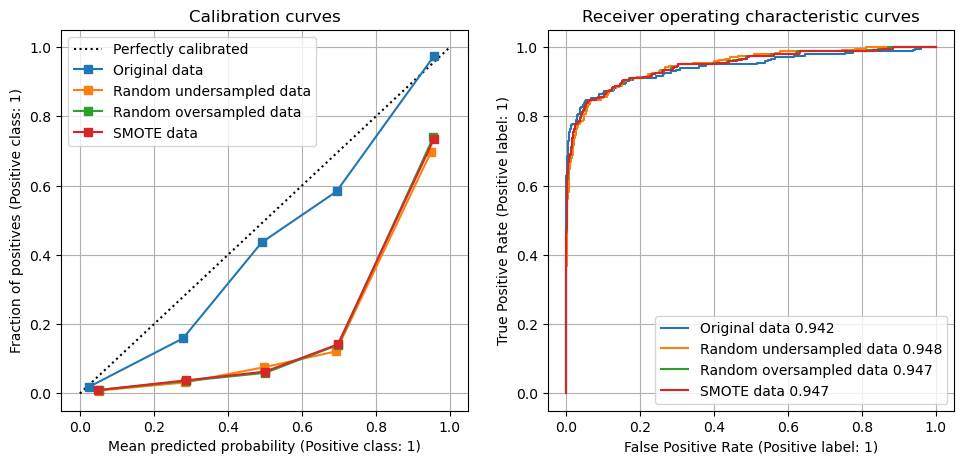

In [9]:
fig = plt.figure(figsize=(10,5))

# Calibration
ax1 = fig.add_subplot(121)
disp1 = CalibrationDisplay.from_estimator(
    model, X_test, y_test, ax=ax1, n_bins=5, label='Original data')
disp2 = CalibrationDisplay.from_estimator(
    model_undersampled, X_test, y_test, ax=ax1, n_bins=5, label='Random undersampled data')
disp3 = CalibrationDisplay.from_estimator(
    model_oversampled, X_test, y_test, ax=ax1, n_bins=5, label='Random oversampled data')
disp4 = CalibrationDisplay.from_estimator(
    model_smote, X_test, y_test, ax=ax1, n_bins=5, label='SMOTE data')
ax1.legend(loc='upper left')
ax1.set_title('Calibration curves')
ax1.grid()

# ROC
ax2 = fig.add_subplot(122)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
disp1 = RocCurveDisplay.from_estimator(
    model, X_test, y_test, ax=ax2, label=f'Original data {auc:0.3f}')
auc = roc_auc_score(y_test, model_undersampled.predict_proba(X_test)[:,1])
disp2 = RocCurveDisplay.from_estimator(
    model_undersampled, X_test, y_test, ax=ax2, label=f'Random undersampled data {auc:0.3f}')
auc = roc_auc_score(y_test, model_oversampled.predict_proba(X_test)[:,1])
disp3 = RocCurveDisplay.from_estimator(
    model_oversampled, X_test, y_test, ax=ax2, label=f'Random oversampled data {auc:0.3f}')
auc = roc_auc_score(y_test, model_smote.predict_proba(X_test)[:,1])
disp4 = RocCurveDisplay.from_estimator(
    model_smote, X_test, y_test, ax=ax2, label=f'SMOTE data {auc:0.3f}')
ax2.set_title('Receiver operating characteristic curves')
ax2.grid()

plt.tight_layout(pad=2)
plt.show()

## Using SK-Learn calibrator to calibrate over-sampled (SMOTE) data

Here we recalibrate the SMOTE model.

In [10]:
calibrated_SMOTE_model = CalibratedClassifierCV(model_smote, method='sigmoid', cv=5)
calibrated_SMOTE_model.fit(X_train, y_train)

# Get acuracy scores
print (f'ROC AUC: {roc_auc_score(y_test, calibrated_SMOTE_model.predict_proba(X_test)[:,1]):0.3f}')
print (f'Recall: {recall_score(calibrated_SMOTE_model.predict(X_test), y_test):0.3f}')
print (f'Precision: {precision_score(calibrated_SMOTE_model.predict(X_test), y_test):0.3f}')

ROC AUC: 0.942
Recall: 0.898
Precision: 0.754


Note: By recalibration we have lost the enhances precision gained by using SMOTE.

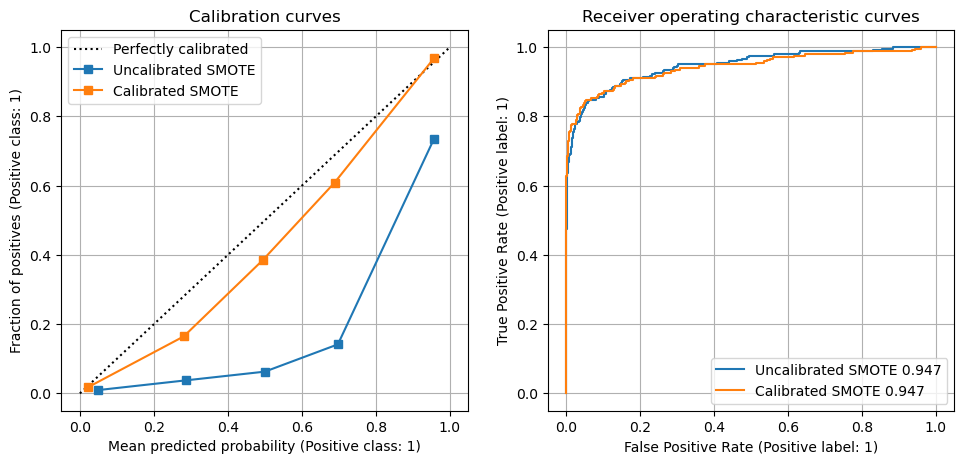

In [11]:
fig = plt.figure(figsize=(10,5))

# Calibration
ax1 = fig.add_subplot(121)
disp1 = CalibrationDisplay.from_estimator(
    model_smote, X_test, y_test, ax=ax1, n_bins=5, label='Uncalibrated SMOTE')
disp2 = CalibrationDisplay.from_estimator(
    calibrated_SMOTE_model, X_test, y_test, ax=ax1, n_bins=5, label='Calibrated SMOTE')
ax1.set_title('Calibration curves')
ax1.legend(loc='upper left')
ax1.grid()

# ROC
ax2 = fig.add_subplot(122)
auc = roc_auc_score(y_test, model_smote.predict_proba(X_test)[:,1])
disp1 = RocCurveDisplay.from_estimator(
    model_smote, X_test, y_test, ax=ax2, label=f'Uncalibrated SMOTE {auc:0.3f}')
auc = roc_auc_score(y_test, model_smote.predict_proba(X_test)[:,1])
disp1 = RocCurveDisplay.from_estimator(
    calibrated_SMOTE_model, X_test, y_test, ax=ax2, label=f'Calibrated SMOTE {auc:0.3f}')

ax2.set_title('Receiver operating characteristic curves')
ax2.grid()

plt.tight_layout(pad=2)
plt.show()

## Observations

Using under-sampling of the majority class, or over-sampling of the minority class (including use of SMOTE), significantly disrupts model calibration.

This effect could be especially significant if the model probabilities are being used to report risk, in which case over-sampling or under-sampling should be avoided, or the model recalibrated (which will lose the improved precision that comes by balancing the classes).